# 5. K-Means

In [1]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('KMeansData.csv')

In [4]:
X = dataset.iloc[:, :].values # 비지도 학습이므로 X값만 존재
# X = dataset.values
# X = dataset.to_numpy()

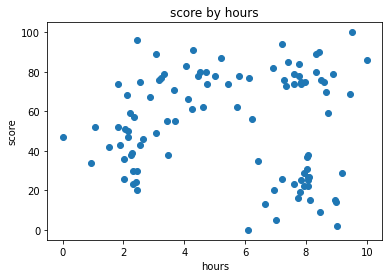

In [5]:
plt.scatter(X[:, 0], X[:, 1]) 
plt.title('score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

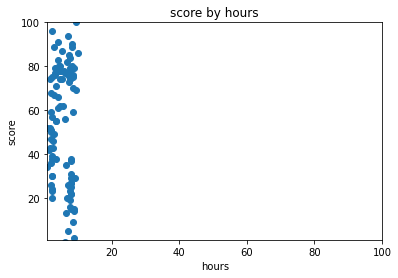

In [6]:
# 축 범위 통일하기
plt.scatter(X[:, 0], X[:, 1]) 
plt.title('score by hours')
plt.xlabel('hours')
plt.xlim(1, 100)
plt.ylabel('score')
plt.ylim(1, 100)
plt.show()

In [7]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

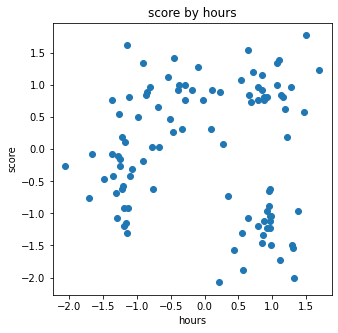

In [8]:
plt.figure(figsize = (5, 5))
plt.scatter(X[:, 0], X[:, 1]) 
plt.title('score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

C:\Users\seoyeon\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\seoyeon\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\seoyeon\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\seoyeon\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

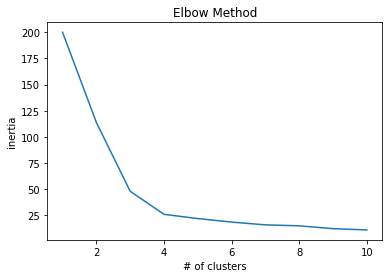

In [11]:
# Elbow Method
from sklearn.cluster import KMeans
inertia_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_) # 각 지점으로부터 클러스터의 중심(centroid) 까지의 거리의 제곱의 합
    
plt.plot(range(1, 11), inertia_list)
plt.title('Elbow Method')
plt.xlabel('# of clusters')
plt.ylabel('inertia')
plt.show()

In [13]:
K = 4 # Optinal K = 4
kmeans = KMeans(n_clusters=K, random_state=0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

C:\Users\seoyeon\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 3, 3, 0, 0, 1, 1, 0, 2, 0, 0, 3, 1, 3, 3, 0, 1, 2, 3, 0, 1, 0,
       3, 1, 2, 2, 3, 3, 3, 3, 1, 1, 3, 0, 2, 2, 3, 0, 0, 0, 3, 1, 2, 3,
       3, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 3, 1, 1, 2, 2, 2, 2, 1,
       1, 0, 1, 2, 3, 2, 2, 2, 3, 3, 3, 3, 0, 2, 1, 2, 1, 1, 2, 0, 3, 1,
       2, 3, 0, 1, 0, 2, 3, 2, 2, 0, 1, 3])

In [17]:
centroid = kmeans.cluster_centers_

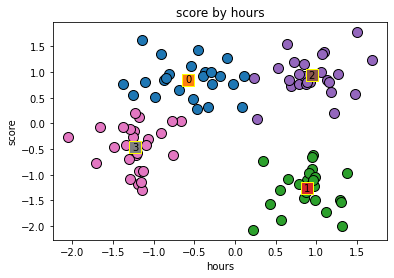

In [23]:
# 데이터 시각화
for cluster in range(K):
    plt.scatter(X[y_kmeans == cluster, 0], X[y_kmeans == cluster, 1], s = 100, edgecolor = 'black')
    plt.scatter(centroid[cluster, 0], centroid[cluster, 1], s = 150, edgecolor = 'yellow', marker = 's')
    plt.text(centroid[cluster, 0], centroid[cluster, 1], cluster, va='center', ha='center') 
plt.title('score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

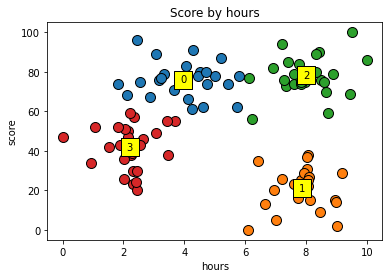

In [30]:
# 스케일링 원복
X_org = sc.inverse_transform(X) 
centeroid_org = sc.inverse_transform(centroid)

for cluster in range(K):
    plt.scatter(X_org[y_kmeans == cluster, 0], X_org[y_kmeans == cluster, 1], s=100, edgecolor='black') # 각 데이터
    plt.scatter(centeroid_org[cluster, 0], centeroid_org[cluster, 1], s=300, edgecolor='black', color='yellow', marker='s') # 중심점 네모
    plt.text(centeroid_org[cluster, 0], centeroid_org[cluster, 1], cluster, va='center', ha='center') # 클러스터 텍스트 출력
    
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()